This notebook is implemented using Prophet model to predict BTC price in the goal of comparing with the ARIMA/SARIMAX model used in external.ipynb. This helps set the model engine we used for the cryptocurrency portfolio advisor.

In [3]:
import gc
from tqdm import tqdm
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

import datetime as dt
from datetime import date
from datetime import timedelta
from prophet import Prophet

%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

Preprocessing Data

In [4]:
data0 = pd.read_csv("crypto-markets.csv")
data0[-5:]

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1622.0,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1823.0,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1913.0,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1788.0,0.4421,3124.52
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


In [5]:
symbols=data0['symbol'].unique()
print(symbols[0:20])

['BTC' 'XRP' 'ETH' 'XLM' 'BCH' 'EOS' 'LTC' 'USDT' 'BSV' 'ADA' 'XMR' 'TRX'
 'MIOTA' 'DASH' 'XEM' 'BNB' 'NEO' 'ETC' 'ZEC' 'BTG']


In [6]:
data1=data0[data0['symbol']=='BTC']
data1['date']=pd.to_datetime(data1['date'])
data2=data1[['date','close']]
data2

,date,close
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21
...,...,...
2037,2018-11-25,4009.97
2038,2018-11-26,3779.13
2039,2018-11-27,3820.72
2040,2018-11-28,4257.42


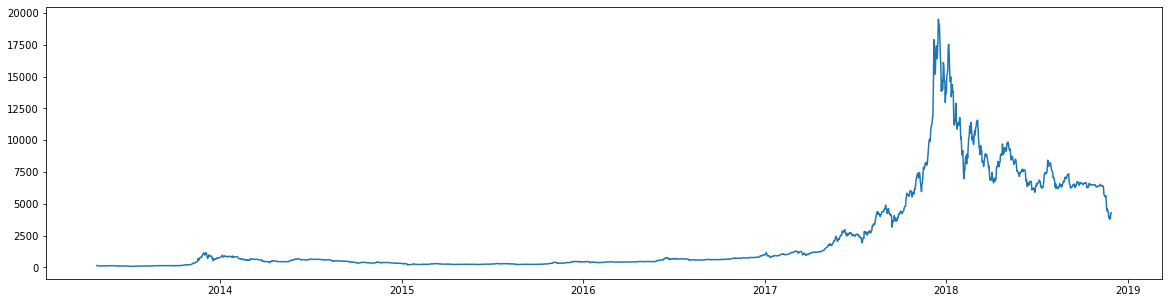

In [7]:
item1=data2

item1.columns = ['ds','y']
item1.y = item1.y.astype('float')
item1.ds = item1.ds.astype('datetime64')

rcParams['figure.figsize'] = 20,5
plt.plot(item1.ds, item1.y)

Prediction on past data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


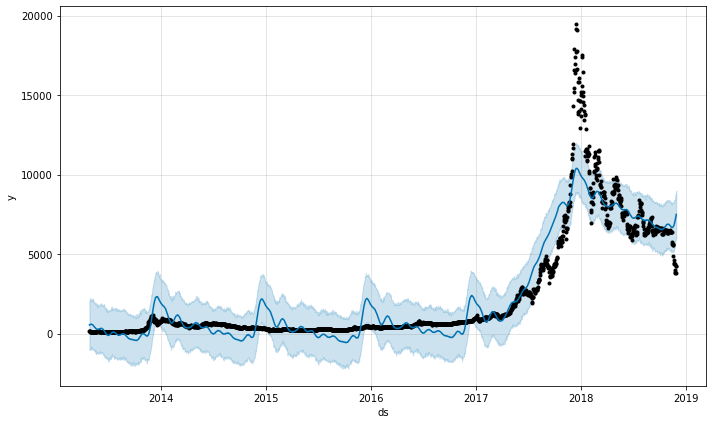

In [8]:
ph = Prophet()
ph.fit(item1)
forecast1=ph.predict(item1)
figure = ph.plot(forecast1)
figure.show()

Prediction on future based on fit on past

In [10]:
from datetime import timedelta
start0 = dt.datetime.strptime('2018-11-30','%Y-%m-%d').date()
end0   = dt.datetime.strptime('2022-12-31','%Y-%m-%d').date()
print((end0-start0).days)

1492


In [11]:
def daterange(start,end):
    for i in range((end-start).days):
        return start+timedelta(i) 

In [12]:
dates0=[]
for i in range((end0-start0).days):
    dates0+=[(start0+timedelta(i)).strftime('%Y-%m-%d') ]
print(dates0[0:10])

['2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09']


In [13]:
dates0_df=pd.DataFrame(dates0)
dates0_df.columns=['ds']
dates0_df

,ds
0,2018-11-30
1,2018-12-01
2,2018-12-02
3,2018-12-03
4,2018-12-04
...,...
1487,2022-12-26
1488,2022-12-27
1489,2022-12-28
1490,2022-12-29


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


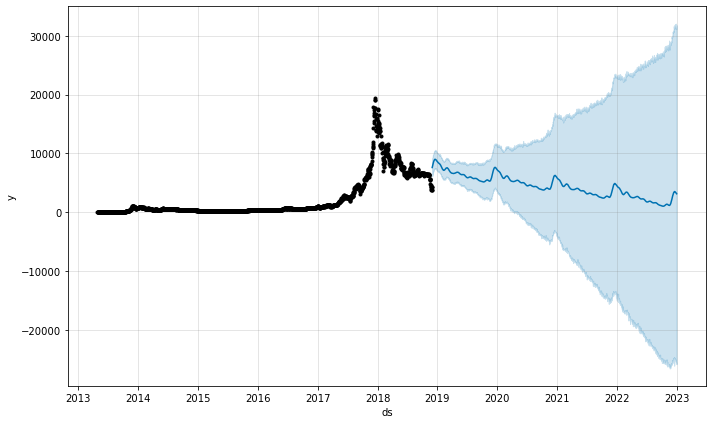

In [14]:
pp = Prophet()
pp.fit(item1)
forecast3=pp.predict(dates0_df)
figure = pp.plot(forecast3)
figure.show()

Now we classify the Prophet prediction for some types of cryptocurrencies:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


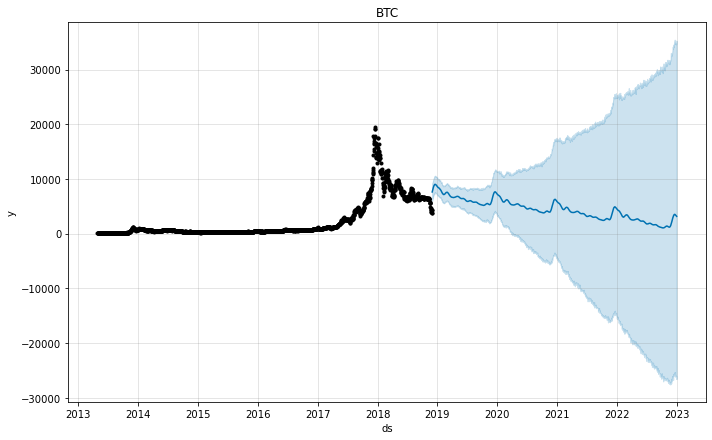

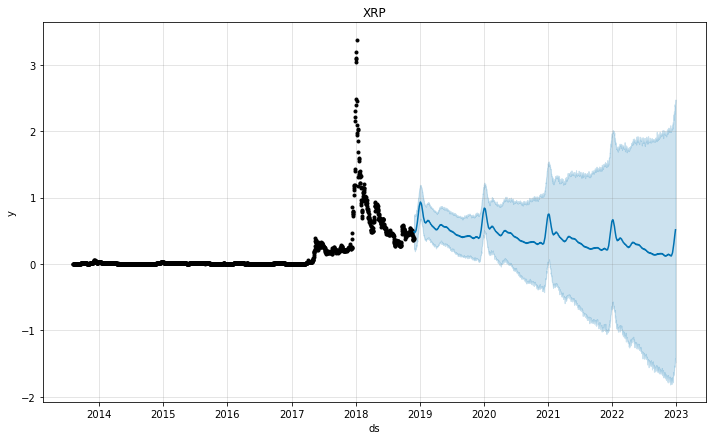

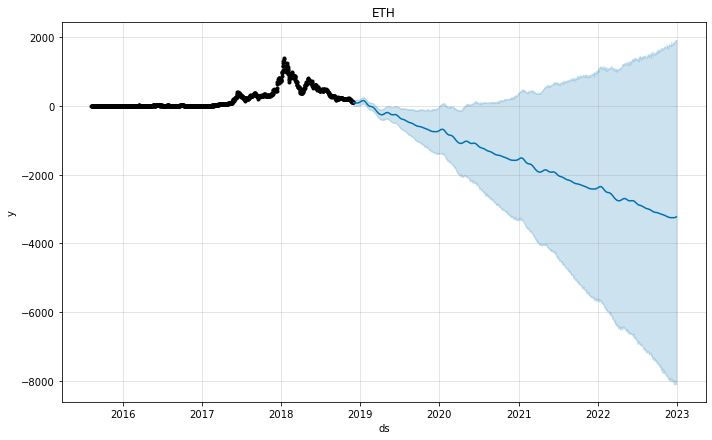

In [15]:
for item in symbols[0:3]:
    data1=data0[data0['symbol']==item]
    data1['date']=pd.to_datetime(data1['date'])
    item1=data1[['date','close']]

    item1.columns = ['ds','y']
    item1.y = item1.y.astype('float')
    item1.ds = item1.ds.astype('datetime64')

    ph = Prophet()
    ph.fit(item1)
    forecast3=ph.predict(dates0_df)
    figure = ph.plot(forecast3)
    plt.title(item)
    figure.show()